100%|██████████| 64/64 [00:00<00:00, 2449.39it/s]


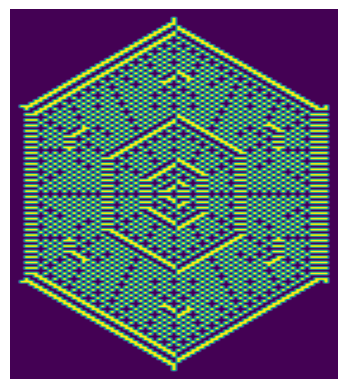

In [2]:
import torch, math, matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm

rule, time = 50, 64 # parameters

state = torch.zeros((7,5), dtype=torch.int64); state[3,2]=1
rule = torch.tensor(([int(d) for d in 8*'0'+str(bin(rule))[2:]])[:-9:-1])
population = [1]

for step in tqdm(range(time)):
    height, width = state.size(dim=0), state.size(dim=1)
    if step % 4 == 0:
        state = F.pad(state, (0,0,2,2), "constant", 0)
    elif step % 2 == 0:
        state = F.pad(state, (2,2,2,2), "constant", 0)
    config = 4*state + torch.roll(state, 1, 0) + torch.roll(state, -1, 0)
    config[0::2,0::2] += torch.roll(state, 1, 1)[0::2,0::2]
    config[1::2,0::2] += torch.roll(state, -1, 1)[1::2,0::2]
    config[0::2,1::2] += torch.roll(state, -1, 1)[0::2,1::2]
    config[1::2,1::2] += torch.roll(state, 1, 1)[1::2,1::2]
    state = rule.take(config)
    population.append(int(torch.sum(state)))

state = torch.reshape(state,(height,width))
plt.axis('off'); plt.imshow(state, aspect=1/math.sqrt(3), interpolation='antialiased')

In [97]:
population

[1,
 4,
 9,
 12,
 18,
 24,
 36,
 48,
 54,
 60,
 84,
 90,
 108,
 126,
 162,
 180,
 186,
 192,
 216,
 222,
 252,
 270,
 330,
 360,
 390,
 396,
 480,
 486,
 552,
 582,
 690,
 696,
 702,
 708,
 732,
 738,
 768,
 786,
 846,
 876,
 918,
 924,
 1044,
 1050,
 1140,
 1194,
 1350,
 1404,
 1434,
 1440,
 1524,
 1530,
 1632,
 1674,
 1866,
 1944,
 2046,
 2040,
 2292,
 2286,
 2484,
 2526,
 2838,
 2760,
 2778]

In [3]:
state

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])